Thay #likes và #dislikes ở biểu đồ này thành #likes/#views và #dislikes/#views.


In [73]:
#import and merge data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
data_raw = pd.read_csv("youtube data/VIDEO_URL_50_ADD_DISLIKE.csv")
data_annotation = pd.read_csv("youtube data/VIDEO_URL_50_ANNOTATION.csv")
data = pd.merge(data_raw, data_annotation)

In [74]:
#caculate like/view and dislike/view
data['like/view']=data['num_like']/data['num_view']
data['dislike/view']=data['num_dislike']/data['num_view']

In [75]:
#caculate the mean like/view and dislike/view each type of video
#Seller Showcase Only: SS
#Seller Demo x Killing: SK
#Seller Demo x Non-killing: SN
#Non-Seller x Killing: NK
#Non-Seller x Non-Killing: NN
SS_like = data[(data['seller_showcase_only']=='x')]['like/view'].mean()
SS_dislike = data[(data['seller_showcase_only']=='x')]['dislike/view'].mean()
print('Seller Showcase Only: ',SS_like,' ',SS_dislike)

SK_like = data[(data['seller_demo_has_killing']=='x')]['like/view'].mean()
SK_dislike = data[(data['seller_demo_has_killing']=='x')]['dislike/view'].mean()
print('Seller Demo x Killing: ',SK_like,' ',SK_dislike)

SN_like = data[(data['seller_demo_no_killing']=='x')]['like/view'].mean()
SN_dislike = data[(data['seller_demo_no_killing']=='x')]['dislike/view'].mean()
print('Seller Demo x Non-killing: ',SN_like,' ',SN_dislike)

NK_like = data[(data['non_seller_has_killing']=='x')]['like/view'].mean()
NK_dislike = data[(data['non_seller_has_killing']=='x')]['dislike/view'].mean()
print('Non-Seller x Killing: ',NK_like,' ',NK_dislike)

NN_like = data[(data['non_seller_no_killing']=='x')]['like/view'].mean()
NN_dislike = data[(data['non_seller_no_killing']=='x')]['dislike/view'].mean()
print('Non-Seller x Non-Killing: ',NN_like,' ',NN_dislike)

Seller Showcase Only:  0.022548661235355986   0.0006312844549656031
Seller Demo x Killing:  0.013151391734222815   0.0005687889239943822
Seller Demo x Non-killing:  0.03550305526337506   0.0005231552401761527
Non-Seller x Killing:  0.013624883449311773   0.0005927064094030939
Non-Seller x Non-Killing:  0.08194472446649652   0.007525298967934334


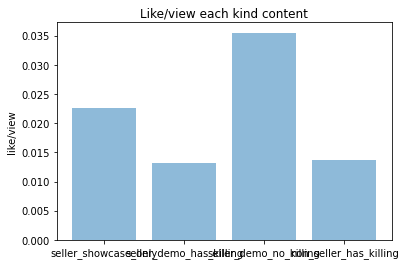

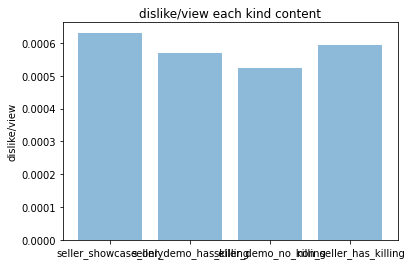

In [76]:
#draw plot
objects = ['seller_showcase_only', 'seller_demo_has_killing', 'seller_demo_no_killing', 'non_seller_has_killing' ]
y_pos = np.arange(len(objects))
like=[SS_like, SK_like, SN_like, NK_like]
dislike=[SS_dislike,SK_dislike,SN_dislike,NK_dislike]

#like plot
plt.bar(y_pos, like, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('like/view')
plt.title('Like/view each kind content')
plt.show()

#dislike plot
plt.bar(y_pos, dislike, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('dislike/view')
plt.title('dislike/view each kind content')
plt.show()

chia 3 nhóm: seller/non-seller; rifle type; killed animals xem

- seller bán rifle gì, non dùng gì.
- seller/non săn con gì. với content như v thì like hoặc dislike sẽ như nào.


In [77]:
#collect rifle type of seller and non_seller
seller = data[(data['seller_demo_no_killing']=='x') | (data['seller_demo_has_killing']=='x')]['rifle_type']
non_seller = data[(data['non_seller_no_killing']=='x') | (data['non_seller_has_killing']=='x')]['rifle_type']

seller_rifle={}
for i in seller:
    for rifle in str(i).split(", "):
        if rifle not in seller_rifle.keys():
            seller_rifle[rifle] = 1
        else:
            seller_rifle[rifle]+=1
print("Seller's rifle: ",seller_rifle)

non_seller_rifle={}
for i in non_seller:
    for rifle in str(i).split(", "):
        if rifle not in non_seller_rifle.keys():
            non_seller_rifle[rifle] = 1
        else:
            non_seller_rifle[rifle]+=1
print("Non-seller's rifle: ", non_seller_rifle)


Seller's rifle:  {'Benjamin': 1, 'Condor': 9, 'nan': 3, 'Truyền thống': 1, 'FX': 3}
Non-seller's rifle:  {'nan': 5, 'Condor': 1}


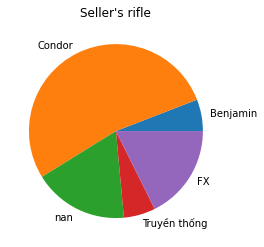

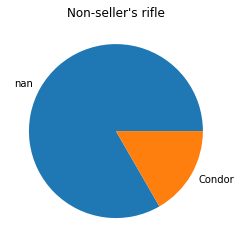

In [81]:
#draw seller's rifle and non-seller's rifle
plt.pie(seller_rifle.values(), labels=seller_rifle.keys())
plt.title("Seller's rifle")
plt.show()
plt.pie(non_seller_rifle.values(), labels=non_seller_rifle.keys())
plt.title("Non-seller's rifle")
plt.show()

Có một cột trong metadata database tên là Youtube topic category (e.g., Lifestyle, Hobby, Entertainment, etc.), kiểm tra xem với 3 categories có tần suất cao nhất là Lifestyle, Hobby, và Health thì những video đó là loại gì.

Tìm trong comments database xem giá cả trung bình của thị trường này như thế nào. Hiện tại database này còn vài comments mà 3 người chưa thống nhất, khi nào finalize xong a sẽ nói.


In [79]:
#get category form each video
data['category']=""
for i in range(len(data)):
    for category in str(data['video_topic_category'][i]).split(','):
        data['category'][i] += str(category.replace('https://en.wikipedia.org/wiki/','')) +","
    data['category'][i]=data['category'][i][:-1]

#count the number of category
categories = {}
for category in data['category']:
    for i in category.split(', '):
        if i not in categories.keys():
            categories[i]=1
        else:
            categories[i]+=1

#count the number of video type in each category
#categories + video type: cat_vid
cat_vid={}

for i in range(len(data)):
    for category in categories.keys():
        if category in data['category'][i]:
            if category not in cat_vid:
                cat_vid[str(category)] = {}

            for vid_type in ['seller_showcase_only','seller_showcase_with_dead_animal', 'seller_demo_no_killing',
                                'seller_demo_has_killing', 'non_seller_has_killing', 'non_seller_no_killing']:
                if data[str(vid_type)][i] == 'x':
                    if vid_type not in cat_vid[category].keys():
                        cat_vid[category][vid_type]=1
                    else:
                        cat_vid[category][vid_type]+=1

C:\Users\hoang\AppData\Local\Temp/ipykernel_21228/3102281131.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category'][i] += str(category.replace('https://en.wikipedia.org/wiki/','')) +","
C:\Users\hoang\AppData\Local\Temp/ipykernel_21228/3102281131.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category'][i]=data['category'][i][:-1]


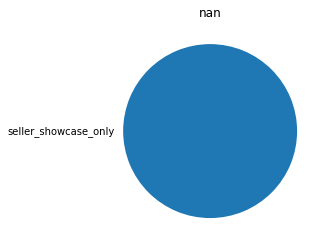

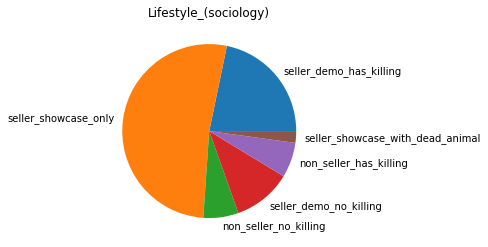

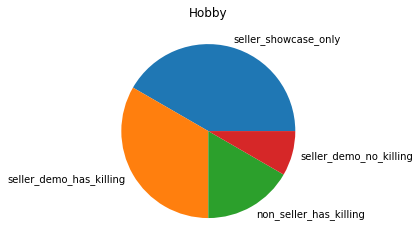

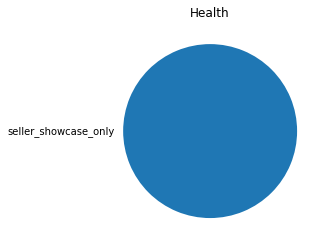

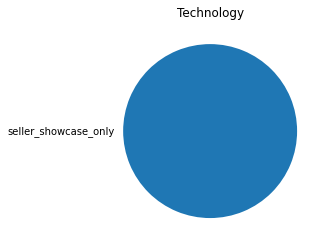

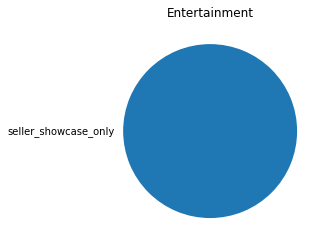

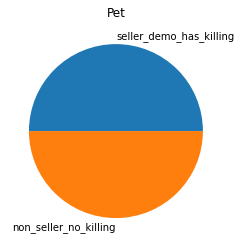

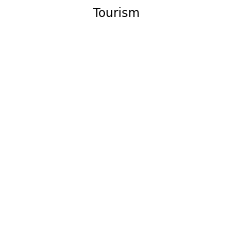

In [80]:
#draw all plot of video type in each category
fig=0
for cat in cat_vid.keys():
    plt.figure(fig)
    plt.pie(cat_vid[cat].values(), labels=cat_vid[cat].keys())
    plt.title(cat)
    fig+=1
plt.show()
